In [1]:
from ctlearn_manager import CTLearnModelManager, CTLearnTriModelManager, load_model_from_index

# 🧠 Create new CTLearnModelManager
CTLearnModelManager is an object that allows you to setup and train a CTLearn model

In [2]:
# Where all the models are stored
MODEL_INDEX_FILE = "/home/blacave/CTLearn/Software/CTLearn-Manager/ctearn_models_index.ecsv"
# General parameters
model_parameters = {
    'model_nickname' : "type_stereo_20deg",
    'model_dir' : "/home/blacave/CTLearn/Data/CTLearn_Models_SST1M/",
    'notes' : "Stereo model for 20deg zenith distance",
    'reco' : 'type', #["energy", "direction", "type"]
    'channels' : ['cleaned_image', 'cleaned_relative_peak_time'], # Order matters
    'telescope_names' : ['SST1M_1', 'SST1M_2'],
    'telescopes_indices' : [1, 2],
    'training_gamma_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Gamma_diffuse/20deg/merged/training/'],
    'training_proton_dirs' : ['/home/blacave/CTLearn/Data/DL1/SST1M/MC/Proton_diffuse/20deg/merged/training/'],
    'training_gamma_zenith_distances' : [20],
    'training_gamma_azimuths' : [0],
    'training_proton_zenith_distances' : [20],
    'training_proton_azimuths' : [0],
    'max_training_epochs' : 15, 
}
new_model = CTLearnModelManager(model_parameters, MODEL_INDEX_FILE)
new_model.save_to_index()

🧠 Model name: type_TEL1_2_ZD20_Az0
❌ Model nickname type_stereo_20deg already in table


📊 Model trained for 15 epochs
🛑 Model already trained for 15 epochs. Will not train further.


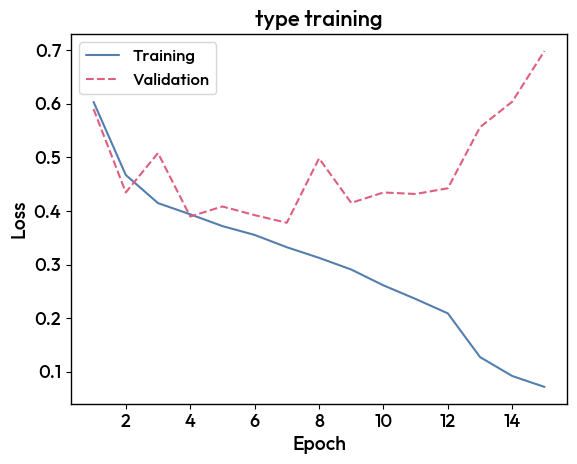

In [3]:
new_model.launch_training(n_epochs=15)

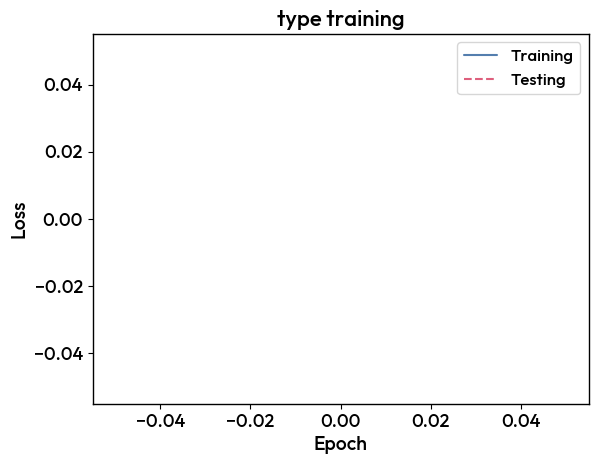

In [4]:
new_model.plot_loss()